In [3]:
import cv2

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('IMG20180905143750.jpg',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

<Figure size 640x480 with 4 Axes>

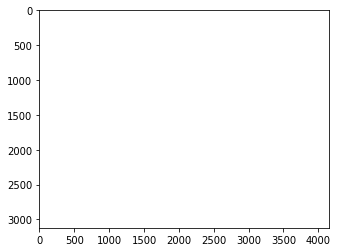

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('IMG20180905143750.jpg')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

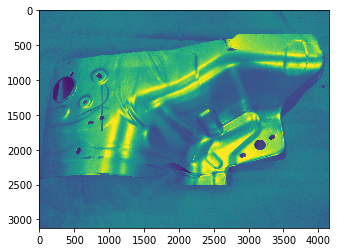

In [6]:
from skimage import io
img = io.imread('IMG20180905143750.jpg', as_gray=True)
plt.imshow(img)

In [7]:
img = cv2.imread('IMG20180905143750.jpg',0)
edges = cv2.Canny(img,100,200)

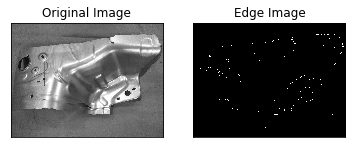

In [8]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

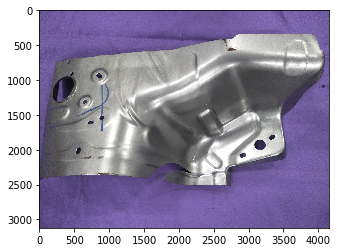

In [9]:
img = cv2.imread('IMG20180905143750.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


255


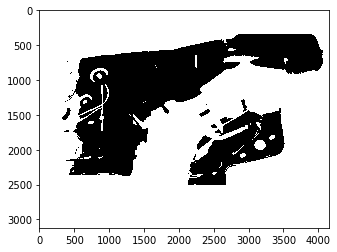

In [10]:
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv2.threshold(img_gray, a/2, a,cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')
print(a)

In [11]:
image, contours, hierarchy = cv2.findContours(image = thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_copy)


In [16]:
image = cv2.imread('IMG20180905143750.jpg') 
cv2.waitKey(0) 
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2.imshow('Canny Edges After Contouring', edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.imshow('Contours', image) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

Number of Contours found = 1485


In [17]:
import keras

In [18]:
# import cv2
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# feature = cv2.HuMoments(cv2.moments(image)).flatten()
# # plt.imshow(feature)

In [20]:
g_kernel = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

img = image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

cv2.imshow('image', img)
cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
cv2.imshow('gabor kernel (resized)', g_kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()
